1. Картинка на PCA
2. 3 алгоритма
3. Метрика

In [1]:
import numpy as np
import csv
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Gather Data

In [2]:
blood = []
with open("blood/transfusion.data", 'r') as fn:
  raw_blood = csv.reader(fn, delimiter = ',')
  for line in raw_blood:
    blood.append(line)

Immediately split it into train/test

In [3]:
b_labels = blood[0]
b_data = blood[1:]
b_target = np.array([i[-1] for i in b_data])
b_target = b_target.astype(np.float32)
b_data = np.array([i[:-1] for i in b_data])
b_data = b_data.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(
    b_data, b_target, test_size=0.4, random_state=0)

# Visualize data with PCA

In [4]:
pca = PCA(n_components=2)
X_r = pca.fit(b_data).transform(b_data)
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [  9.99801934e-01   1.70992673e-04]


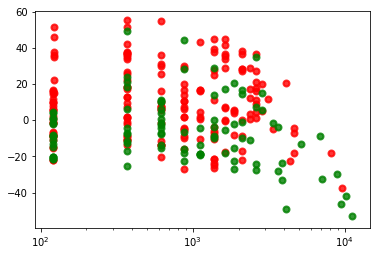

In [5]:
# Visualize
plt.figure()
plt.xscale('log')
colors = ['red', 'green']
lw = 2

for color, i, target_name in zip(colors, [0, 1], ["Yes", "No"]):
  plt.scatter(X_r[b_target == i, 0], X_r[b_target == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.show()

Here on graph green are those who applied.

# SVM Classifier

In [6]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.7533333333333333

In [8]:
# Visualize
plt.figure()
plt.xscale('log')
colors = ['red', 'green']
lw = 2
svm_pred = [svm.predict([x]) for x in b_data]


for color, i, target_name in zip(colors, [0, 1], ["Yes", "No"]):
  plt.scatter(X_r[svm_pred == i, 0], X_r[svm_pred == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.show()

IndexError: in the future, 0-d boolean arrays will be interpreted as a valid boolean index

In [14]:
svm.score(X_test, y_test)

0.7533333333333333

# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,15):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)
  print("n_neighbours = ", i, " score: ", neigh.score(X_test, y_test))

n_neighbours =  1  score:  0.68
n_neighbours =  2  score:  0.783333333333
n_neighbours =  3  score:  0.676666666667
n_neighbours =  4  score:  0.746666666667
n_neighbours =  5  score:  0.646666666667
n_neighbours =  6  score:  0.75
n_neighbours =  7  score:  0.753333333333
n_neighbours =  8  score:  0.78
n_neighbours =  9  score:  0.763333333333
n_neighbours =  10  score:  0.793333333333
n_neighbours =  11  score:  0.793333333333
n_neighbours =  12  score:  0.766666666667
n_neighbours =  13  score:  0.78
n_neighbours =  14  score:  0.753333333333


In [16]:
from sklearn import linear_model

In [17]:
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_train, y_train)

0.7745535714285714

In [18]:
logreg.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

# Stochastic
'Cause we don't want to wait

In [19]:
from sklearn.linear_model import SGDClassifier

In [20]:
clf = SGDClassifier(loss = "log", max_iter=50)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7533333333333333

In [23]:
for x in X_test:
  print(x , clf.predict([x])[0])

[   4.    3.  750.   28.] 0.0
[  2.00000000e+00   1.10000000e+01   2.75000000e+03   4.10000000e+01] 0.0
[    2.     6.  1500.    15.] 1.0
[    4.    10.  2500.    28.] 1.0
[  2.00000000e+00   4.10000000e+01   1.02500000e+04   9.80000000e+01] 1.0
[   2.    2.  500.    4.] 1.0
[  14.    1.  250.   14.] 0.0
[   2.    2.  500.    4.] 1.0
[  23.    3.  750.   40.] 0.0
[    4.    12.  3000.    34.] 1.0
[   11.     6.  1500.    41.] 0.0
[   14.     4.  1000.    38.] 0.0
[   2.    1.  250.    2.] 1.0
[    4.    13.  3250.    39.] 1.0
[  2.00000000e+00   1.30000000e+01   3.25000000e+03   5.30000000e+01] 0.0
[   23.     8.  2000.    69.] 0.0
[   8.    2.  500.   16.] 0.0
[  21.    1.  250.   21.] 0.0
[   14.     7.  1750.    72.] 0.0
[    4.     8.  2000.    40.] 0.0
[   11.     7.  1750.    64.] 0.0
[  11.    2.  500.   11.] 0.0
[  11.    1.  250.   11.] 0.0
[   4.    1.  250.    4.] 0.0
[   6.    3.  750.   26.] 0.0
[   14.     8.  2000.    26.] 0.0
[   2.    1.  250.    2.] 1.0
[  4.00000000e

In [22]:
clf.score(X_test, y_test)

0.7533333333333333